In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from math import inf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')
from pprint import pprint
from io import BytesIO

In [2]:
np.random.seed(73)

In [3]:
def savePlot(name):
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight', dpi = 300)
    buffer.seek(0) 
    with open(name + '.png', 'wb') as f:
        f.write(buffer.getvalue())


In [4]:
def pltTrend(ax, x, y):
    coefficients = np.polyfit(x, y, 1)
    slope, intercept = coefficients
    x_trend = np.linspace(min(x), max(x), 100)
    y_trend = slope * x_trend + intercept
    ax.plot(x_trend, y_trend, linewidth  = 5, color='red')

In [5]:
data = pd.read_csv("data.csv")

In [6]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe();

In [8]:
regions = data['region'].unique();

In [9]:
categ = data[['smoker', 'sex', 'region']]
dummies = pd.get_dummies(categ, dtype=int)
dummies.drop(['smoker_no', 'sex_female'], axis=1, inplace = True)
dummies;

In [10]:
data.drop(categ, axis=1, inplace=True)
data = pd.merge(data, dummies, right_index = True, left_index= True)

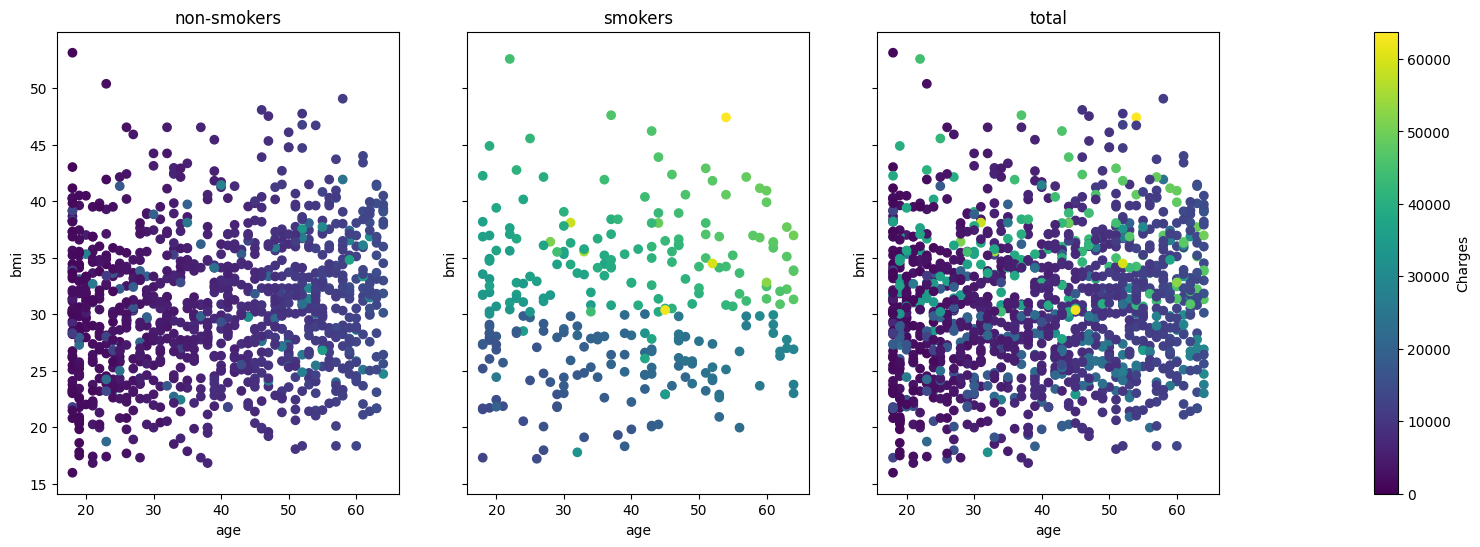

In [11]:
fig, ax = plt.subplots(1 , 3, figsize=(20, 6), sharey = True, sharex = True)
for i in range(len(ax)):
    ax[i].set_xlabel('age')
    ax[i].set_ylabel('bmi')
maxcharge = data['charges'].max()
d1 = data[data['smoker_yes'] == 0]
ax[0].scatter(x=d1['age'], y=d1['bmi'], c=d1['charges'], vmin = 0, vmax=maxcharge)
ax[0].set_title("non-smokers")

d1 = data[data['smoker_yes'] == 1]
ax[1].scatter(x=d1['age'], y=d1['bmi'], c=d1['charges'], vmin = 0, vmax=maxcharge)
ax[1].set_title("smokers")

sctotal = ax[2].scatter(x=data['age'], y=data['bmi'], c=data['charges'], vmin = 0, vmax=maxcharge)
ax[2].set_title('total');
fig.colorbar(sctotal, ax=ax, label='Charges', pad=0.1)
# plt.colorbar(ax[2] , c= d1['charges']*0.001)
savePlot('smokersVizualization')


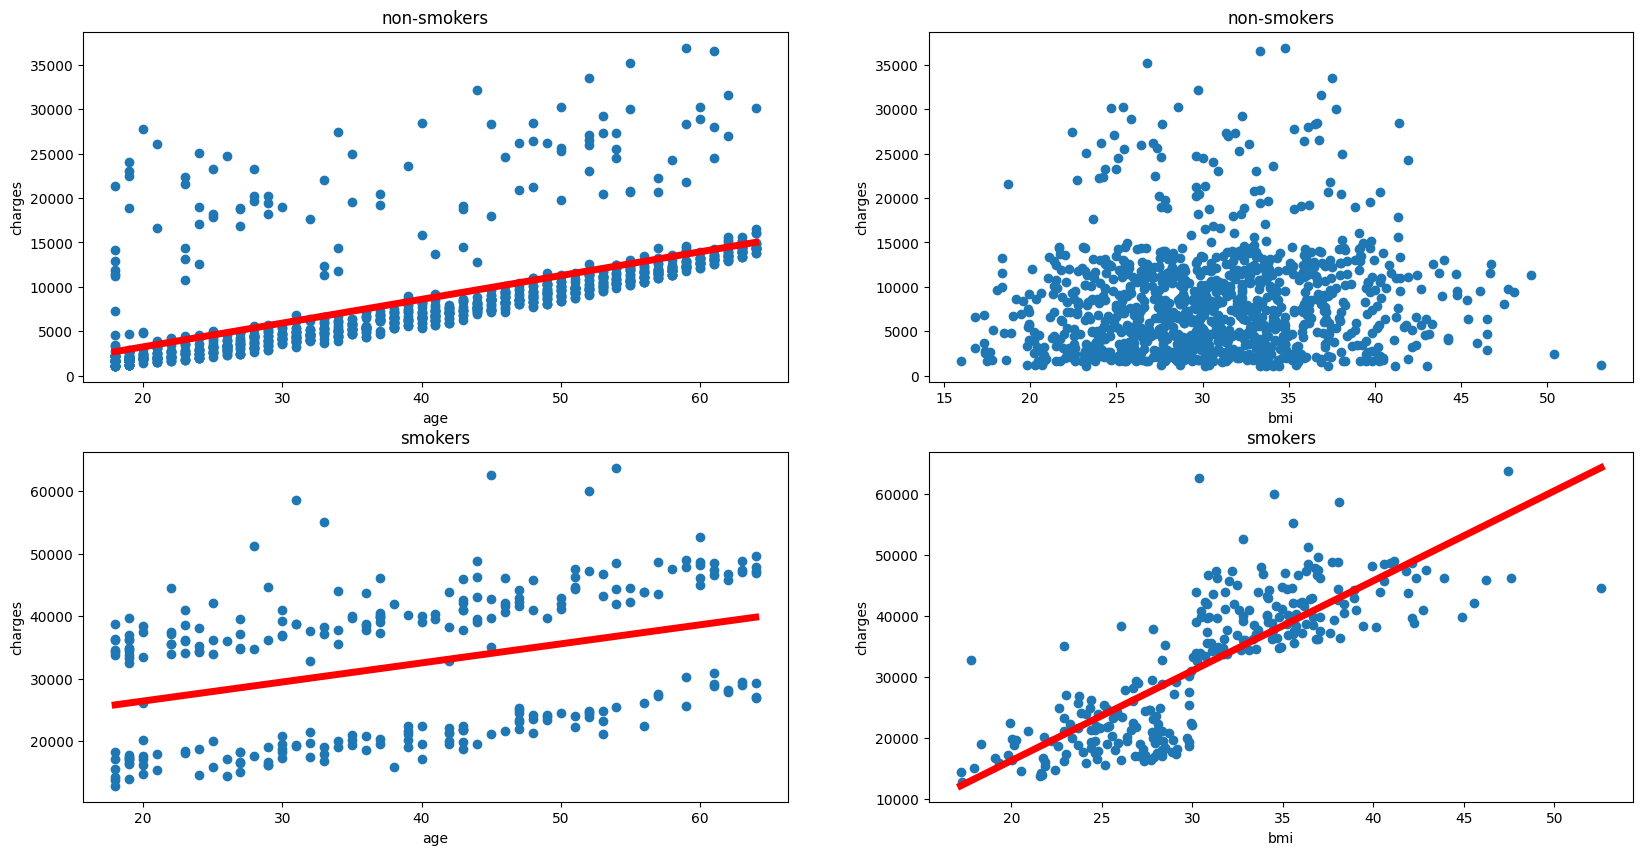

In [12]:
fig, ax = plt.subplots(2 , 2, figsize=(20, 10))

d1 = data[data['smoker_yes'] == 0]
ax[0][0].scatter(x=d1['age'], y = d1['charges'])
ax[0][0].set_xlabel('age')
ax[0][0].set_ylabel('charges')
ax[0][0].set_title("non-smokers")
pltTrend(ax[0][0], d1['age'], d1['charges'])

ax[0][1].scatter(x=d1['bmi'], y = d1['charges'])
ax[0][1].set_xlabel('bmi')
ax[0][1].set_ylabel('charges')
ax[0][1].set_title("non-smokers")

d1 = data[data['smoker_yes'] == 1]
ax[1][0].scatter(x=d1['age'], y = d1['charges'])
ax[1][0].set_xlabel('age')
ax[1][0].set_ylabel('charges')
ax[1][0].set_title("smokers")
pltTrend(ax[1][0], x=d1['age'], y = d1['charges'])


ax[1][1].scatter(x=d1['bmi'], y = d1['charges'])
ax[1][1].set_xlabel('bmi')
ax[1][1].set_ylabel('charges')
ax[1][1].set_title("smokers")
pltTrend(ax[1][1], x=d1['bmi'], y = d1['charges'])

savePlot('smokersVizualization2')


45


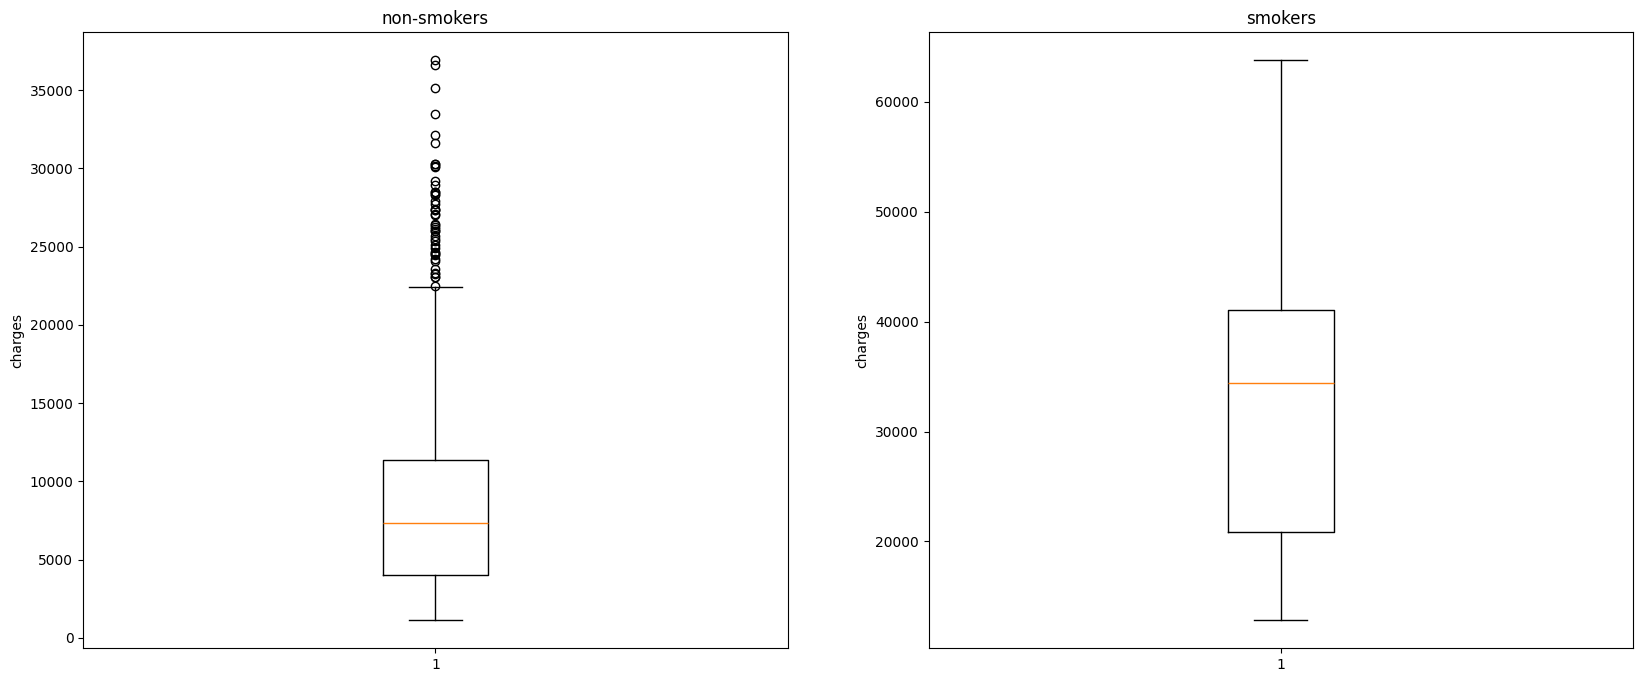

In [13]:
fig, ax = plt.subplots(1 , 2, figsize=(20, 8))

for i in range(len(ax)):
    ax[i].set_ylabel('charges')
ax[0].set_title('non-smokers')
d1 = data[data['smoker_yes'] == 0]
print(len(d1[d1['charges'] > 23000]))
ax[0].boxplot(d1['charges'])
ax[1].set_title('smokers')
d1 = data[data['smoker_yes'] == 1]
ax[1].boxplot(d1['charges']);

savePlot('smokersCharges')

region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64


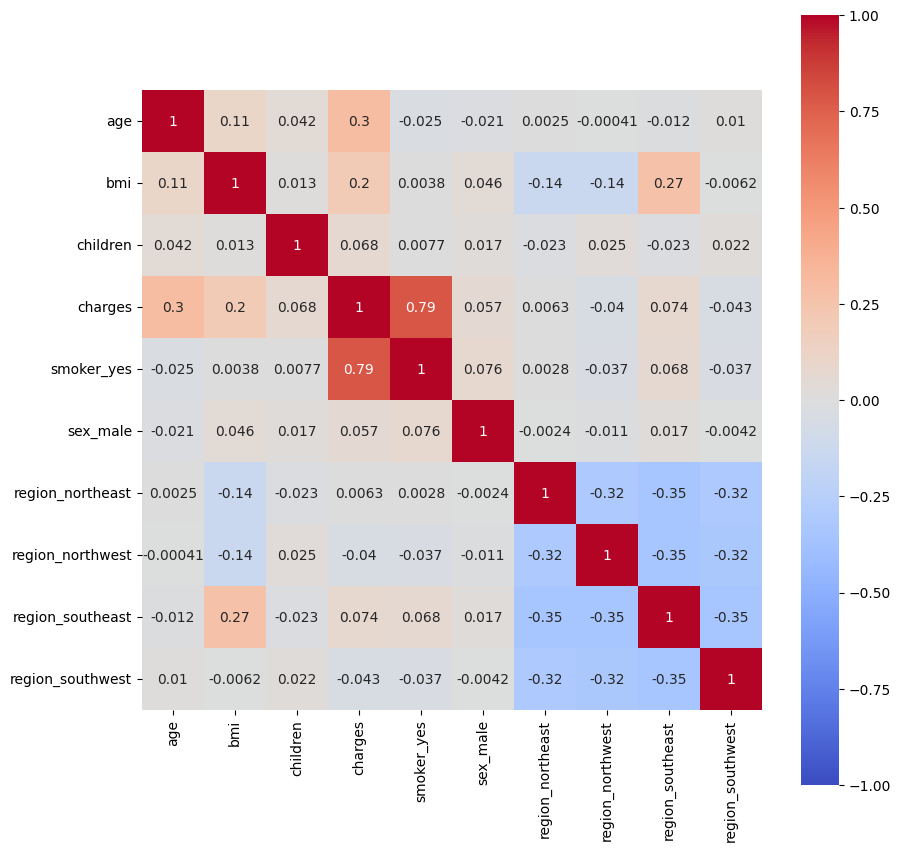

In [14]:
print(data.corr()['charges'].sort_values())
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=np.bool), cmap=sns.color_palette("coolwarm", as_cmap=True), vmin=-1, vmax = 1,
            square=True, annot = True)
savePlot('correlations')
plt.show()


**Вывод:**
1. Стоимость у курильщиков в основном выше
3. Стоимость у не курящих зависит от их возраста, по bmi распределение равномерное
4. Стоимость у курильщиков зависит от bmi, по возрасту распределение равномерно
5. Стоимость не зависит от пола
6. Стоимость не зависит от количества детей
7. Стоимость не зависит от региона

In [15]:
print('smoker median', data[data['smoker_yes'] == 1]['charges'].median(),
      'non-smoker median', data[data['smoker_yes'] == 0]['charges'].median())

smoker median 34456.348450000005 non-smoker median 7345.4053


In [16]:
data = data.drop('sex_male', axis=1)
if('region' in data.columns): data = data.drop(['region'], axis = 1)
for region in regions:
    region = 'region_' + region
    if(region in data.columns): data = data.drop([region], axis = 1)
data = data.drop(['children'], axis= 1)
data

,age,bmi,charges,smoker_yes
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0
...,...,...,...,...
1333,50,30.970,10600.54830,0
1334,18,31.920,2205.98080,0
1335,18,36.850,1629.83350,0
1336,21,25.800,2007.94500,0


In [17]:
dataCopy = data.copy()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
data = dataCopy.copy()
X = data.drop(['charges'], axis= 1)
y = data['charges']
X = X.to_numpy()
quad = PolynomialFeatures (degree = 2, include_bias=False)
X = quad.fit_transform(X)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [21]:
A = X_train
y_train = y_train
X_test

array([[2.30000000e+01, 3.44000000e+01, 0.00000000e+00, ...,
        1.18336000e+03, 0.00000000e+00, 0.00000000e+00],
       [2.80000000e+01, 2.75000000e+01, 0.00000000e+00, ...,
        7.56250000e+02, 0.00000000e+00, 0.00000000e+00],
       [4.40000000e+01, 2.76450000e+01, 0.00000000e+00, ...,
        7.64246025e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.80000000e+01, 2.80000000e+01, 1.00000000e+00, ...,
        7.84000000e+02, 2.80000000e+01, 1.00000000e+00],
       [6.30000000e+01, 3.31000000e+01, 0.00000000e+00, ...,
        1.09561000e+03, 0.00000000e+00, 0.00000000e+00],
       [2.60000000e+01, 3.10650000e+01, 0.00000000e+00, ...,
        9.65034225e+02, 0.00000000e+00, 0.00000000e+00]], shape=(536, 9))

In [22]:
def normalize(A):
    return (A - np.mean(A, axis=0)) / np.std(A, axis=0)

In [23]:
A = normalize(A)
X_test_norm = normalize(X_test)

In [24]:
finLim = 10**(-4)
lr = 10**(-1)
impulse = 0.95

In [25]:
w_original = np.random.rand(A[0].shape[0]).astype(np.float64)
a0_original = np.random.rand(1) 
losses =[]

In [26]:
def gd(w, a0, A, y_train, N, lr, finlim):
    delta = inf
    LM = 0
    try:
        i = 0
        for i in range(N):
            if abs(delta) < finLim:
                print("complete, i:", i)
                break
            y_pred = A @ w + a0
            M = mean_squared_error(y_train, y_pred)
            delta = M - LM
            if(i % 10000 == 0):
                print(i, M, delta)
            LM = M
            losses.append(M)
            error = y_pred - y_train
            w -= 2 *error @ A/802 * lr 
            a0 -= 2 * sum(error)/802 * lr
    except:
        return w, a0
    return w, a0

In [27]:
def nagd(w, a0, A, y_train, N, lr, finlim, mu):
    delta = inf
    LM = 0
    wphi_old = w
    wphi = w
    a0phi_old = a0
    a0phi = a0
    try:
        i = 0
        for i in range(N):
            
            if abs(delta) < finLim:
                print("complete, i: ", i)
                break
            wv = wphi - wphi_old
            a0v = a0phi - a0phi_old
            
            y_pred = A @ (wphi + mu* wv)+ a0phi  + mu * a0v
            M = mean_squared_error(y_train, y_pred)
            delta = M - LM
            if(i % 10000 == 0):
                print(i, M, delta)
            LM = M
            losses.append(M)
            error = y_pred - y_train
            wphi_old = wphi
            a0phi_old = a0phi
            wphi += mu * wv - 2 *error @ A/802 * lr 
            a0phi += mu * a0v - 2 * np.sum(error)/802 * lr
    except KeyboardInterrupt:
        return wphi + mu* wv, a0phi  + mu * a0v
    return wphi + mu* wv, a0phi  + mu * a0v

In [28]:
w= w_original.copy()
a0 = a0_original.copy()

In [29]:
%%time
w, a0 = gd(w, a0, A, y_train, 10**8, lr, finLim)

0 336347521.5880974 336347521.5880974
complete, i: 4971
CPU times: user 1.09 s, sys: 9.7 ms, total: 1.1 s
Wall time: 1.11 s


In [30]:
print('w: ', w, '\na0:', a0)

w:  [  -46.31916375  2904.80880054 -4156.13962693  3132.00101964
  1032.44933143   167.35108949 -3476.39227694 18622.89592365
 -4155.87889625] 
a0: [13410.40693337]


In [31]:
w= w_original.copy()
a0 = a0_original.copy()

In [32]:
%%time
w, a0 = nagd(w, a0, A, y_train, 10**8, lr, finLim, impulse)

0 336347521.5880974 336347521.5880974
complete, i:  4971
CPU times: user 1.03 s, sys: 5 ms, total: 1.03 s
Wall time: 1.03 s


In [33]:
print('w: ', w, '\na0:', a0)

w:  [  -46.31916375  2904.80880054 -4156.13962693  3132.00101964
  1032.44933143   167.35108949 -3476.39227694 18622.89592365
 -4155.87889625] 
a0: [13410.40693337]


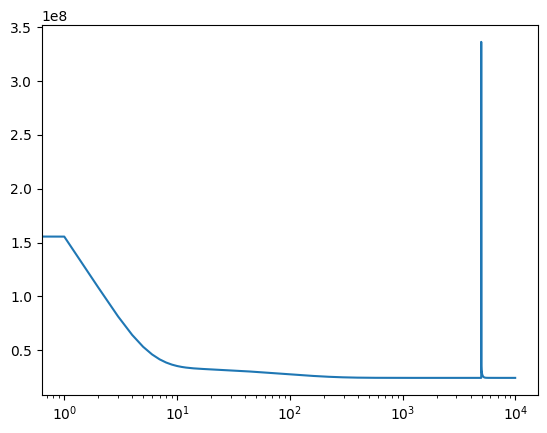

In [34]:
plt.subplot(1, 1, 1)
plt.plot(losses)
plt.xscale('log')
plt.show()


In [35]:
mean_squared_error(y_train, A @ w + a0)

24298017.729753576

In [36]:
y_pred = X_test_norm @ w + a0

In [37]:
X_test[:,0].shape

(536,)

In [38]:
mean_squared_error(y_test, y_pred)

23682468.300967336

In [39]:
r2_score(y_test, y_pred)

0.819843667887223

In [40]:
compare = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
compare.head(5)

,Actual,Predicted
12,1826.84300,3928.449958
306,20177.67113,5172.512768
318,7421.19455,9294.120664
815,1877.92940,3597.440226
157,15518.18025,20762.774513


In [41]:
feature_names = quad.get_feature_names_out(input_features=["age", "bmi", "smoker_yes"])
feature_names

array(['age', 'bmi', 'smoker_yes', 'age^2', 'age bmi', 'age smoker_yes',
       'bmi^2', 'bmi smoker_yes', 'smoker_yes^2'], dtype=object)

std deviation: 4853.901569750786
103 / 536
1 1


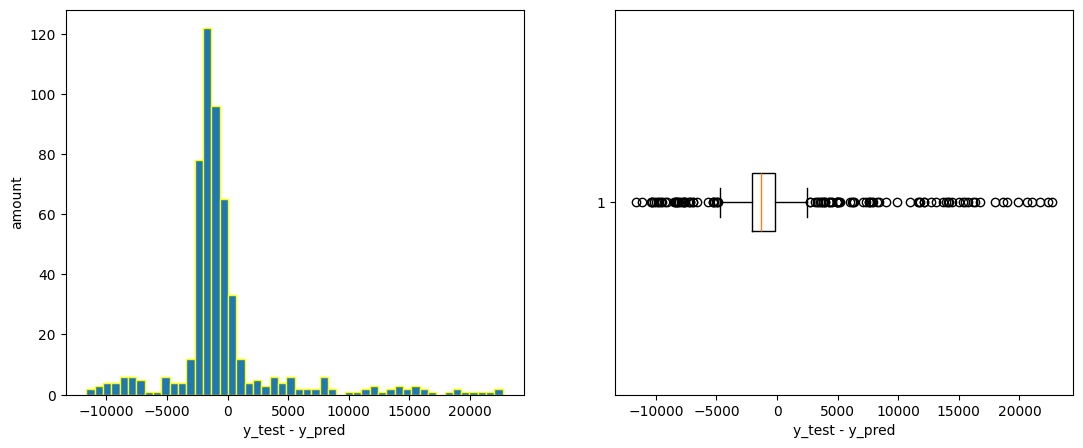

In [42]:
cd = (y_test - y_pred)
fix, ax = plt.subplots(1, 2, figsize = (13, 5), sharex = True)
ax[0].hist(cd, bins=50, edgecolor='yellow');
ax[0].set_xlabel('y_test - y_pred')
ax[0].set_ylabel('amount')
bp = ax[1].boxplot(cd, vert = False);
ax[1].set_xlabel('y_test - y_pred')
savePlot('differences')
print("std deviation:", np.std(cd))
print(len(bp['fliers'][0].get_data()[1]), '/', len(y_pred))
print(bp['whiskers'][1].get_ydata()[1],  bp['whiskers'][0].get_ydata()[1])

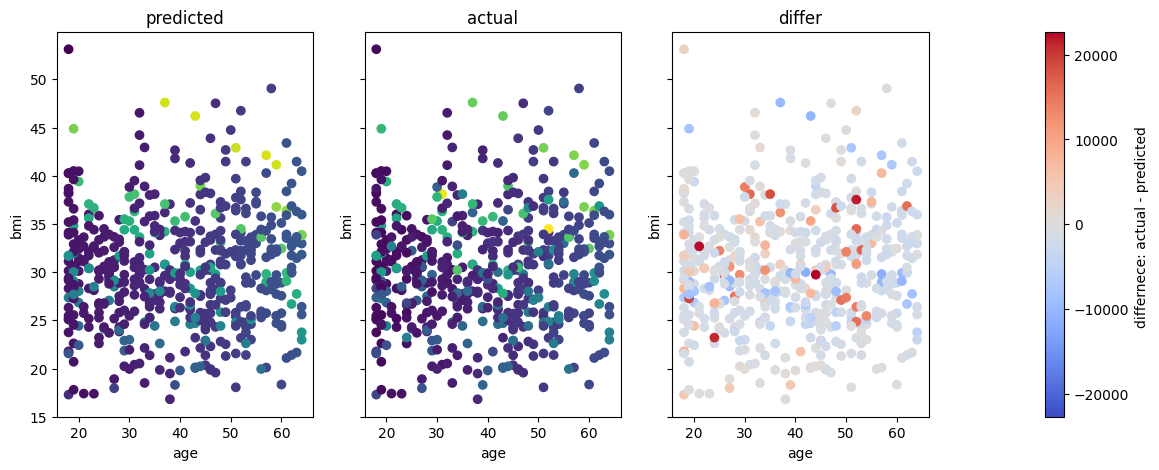

In [43]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharex = True, sharey =True)
for i in range(len(ax)):
    ax[i].set_xlabel('age')
    ax[i].set_ylabel('bmi')
ax[0].set_title('predicted')
ax[0].scatter(x=X_test[:,0], y=X_test[:,1], c=y_pred*0.001, vmin = 0, vmax=60)
ax[1].set_title('actual')
ax[1].scatter(x=X_test[:,0], y=X_test[:,1], c=y_test*0.001, vmin = 0, vmax=60)
ax[2].set_title('differ')

max_abs = np.max(np.abs(cd))
sc = ax[2].scatter(x=X_test[:,0], y=X_test[:,1], c=cd, vmin = -max_abs, vmax = max_abs, cmap='coolwarm');
fig.colorbar(sc, ax=ax, label='differnece: actual - predicted ', pad=0.1)
savePlot("scatterDiffers")

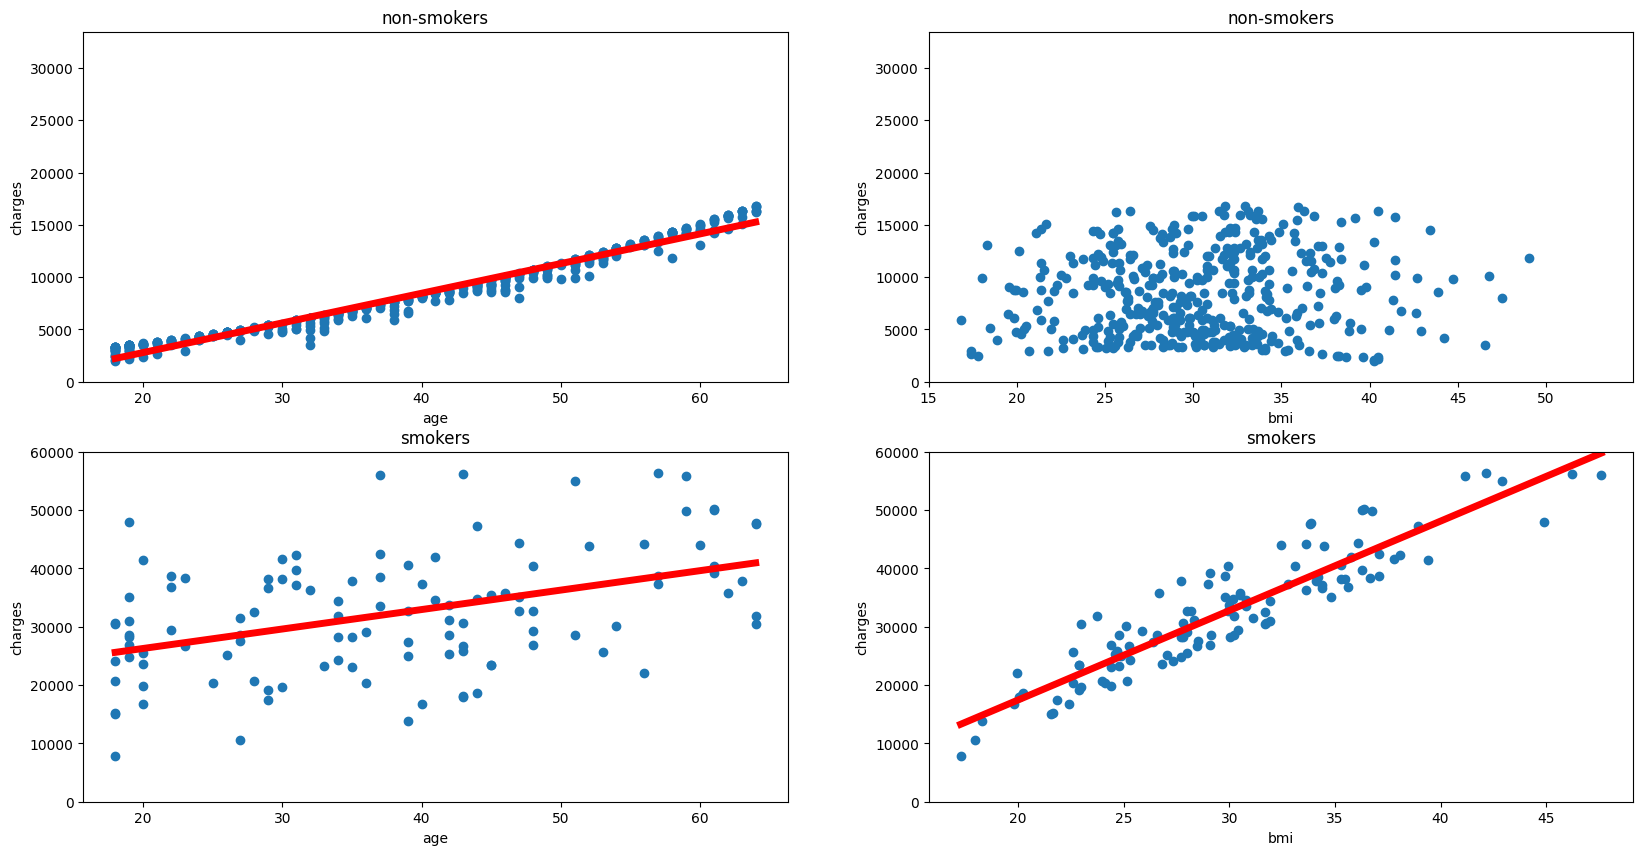

In [44]:
fig, ax = plt.subplots(2 , 2, figsize=(20, 10))

d1 = X_test[X_test[:,2] == 0]
ax[0][0].scatter(x=d1[:,0], y = y_pred[X_test[:,2] == 0])
ax[0][0].set_xlabel('age')
ax[0][0].set_ylabel('charges')
ax[0][0].set_title("non-smokers")
ax[0][0].set_ylim(0, y_test[X_test[:,2] == 0].max())
pltTrend(ax[0][0], d1[:,0],  y_pred[X_test[:,2] == 0])

ax[0][1].scatter(x=d1[:, 1], y =  y_pred[X_test[:,2] == 0])
ax[0][1].set_xlabel('bmi')
ax[0][1].set_ylabel('charges')
ax[0][1].set_title("non-smokers")
ax[0][1].set_ylim(0, y_test[X_test[:,2] == 0].max())


d1 = X_test[X_test[:,2] == 1]
ax[1][0].scatter(x=d1[:,0], y = y_pred[X_test[:,2] == 1])
ax[1][0].set_xlabel('age')
ax[1][0].set_ylabel('charges')
ax[1][0].set_title("smokers")
ax[1][0].set_ylim(0, y_test[X_test[:,2] == 1].max())
pltTrend(ax[1][0], d1[:,0],  y_pred[X_test[:,2] == 1])

ax[1][1].scatter(x=d1[:, 1], y =  y_pred[X_test[:,2] == 1])
ax[1][1].set_xlabel('bmi')
ax[1][1].set_ylabel('charges')
ax[1][1].set_title("smokers")
ax[1][1].set_ylim(0, y_test[X_test[:,2] == 1].max())
pltTrend(ax[1][1], x=d1[:, 1], y = y_pred[X_test[:,2] == 1])

savePlot('predictedVizualization2')


In [45]:
cd.describe()

count      536.000000
mean      -349.439340
std       4858.435809
min     -11638.582013
25%      -2031.188923
50%      -1294.479098
75%       -185.006969
max      22713.191852
Name: charges, dtype: float64

### Веса, полученные в результате различных экспериментов, чтобы стабильно генерировать графики

In [46]:
#without bias
wSmokers3M = [280.26364501,   1366.7653961 , -20258.60494349]
wSmokers2D = [280.26364501,   1366.7653961]

wNoSmokersBackup = [ 2.55509903e+02, -4.82676502e+01,  1.26867744e-01] #finlim = 10**(-1)
wNoSmorkers2D = [255.62720555, -48.42761186]
wNoSmokers3D = [ 2.55509903e+02, -4.82676502e+01]
# with bias (a0)
wSM = [ 212.07302888, 1072.19350186]
a0SM = [-8115.85890909]

wNSM = [264.05053512,  -4.04603343]
a0NSM = [-1745.04973308]

wTotal = [  247.74217412,   180.75136809, 24485.12649644]
a0Total = [-6657.20448768]

#with polynomial feats (deg=2)
WTotalPoly = np.array([1.22160808e+00, 3.58137471e+00, 4.20214935e+01, 9.38440973e+00,
        2.73657446e+00, 1.68370548e+00, 1.36827129e+01, 9.05630595e-02,
        7.86933412e+02, 9.12337626e+00])
a0TotalPoly = np.array([1.36913679])

In [47]:
from sklearn.linear_model import SGDRegressor, ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron

In [48]:
clf = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)

In [49]:
clf = LinearRegression()

In [50]:
clf = SGDRegressor(shuffle = True, loss="huber", max_iter =1000000000)


In [51]:
clf = ElasticNet()

In [52]:
clf = Lasso( max_iter =1000000000)

In [53]:
clf = Ridge()

In [54]:
model = clf.fit(A, y_train)

In [55]:
y_pred = model.predict(X_test_norm) 

In [56]:
model.score(X_test_norm, y_test) #.to_numpy()

0.820147658675223

In [57]:
mean_squared_error(y_test,y_pred)

23642507.162126612

In [58]:
def augment_data(X, y, noise_std=0.03, n_times=12):
    X_new = []
    y_new = []
    for _ in range(n_times):
        noise = np.random.normal(0, noise_std*np.std(X, axis=0), X.shape)
        X_new.append(X + noise)
        y_new.append(y)
    return np.vstack(X_new), np.concatenate(y_new)

In [59]:
A, y_train = augment_data(A, y_train)

In [60]:
wres = wSmokers3M